# Courbe expérimentale.

On trace les temps de congélation en fonction de $h_{tronq}$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
from scipy.optimize import fsolve

import scienceplots

plt.style.use('science')

In [2]:
h = 7e-3

Valeurs de $h_{tronq}$ expérimentales

In [3]:
h_tronq = np.array([2.8, 3.64, 4.48, 5.32, 6.16, 7, 8.4, 9.8, 11.2, 12.6, 14])*1e-3

Valeurs des temps de congélation correspondants pour les cônes de telles hauteurs

In [4]:
t_cone_silicone = np.array([None, 32, 40, None, 46, 55, 67, 75, 89, 120-12, 120-4])
t_cone = np.array([24, 30, 40, 44, 49, 59, 70, 80, 60+35, 120+8, 144])

Création des masques pour n'afficher que les valeurs relevées

In [5]:
mask = np.array([value is not None for value in t_cone_silicone])
mask_bis = np.array([value is not None for value in t_cone])

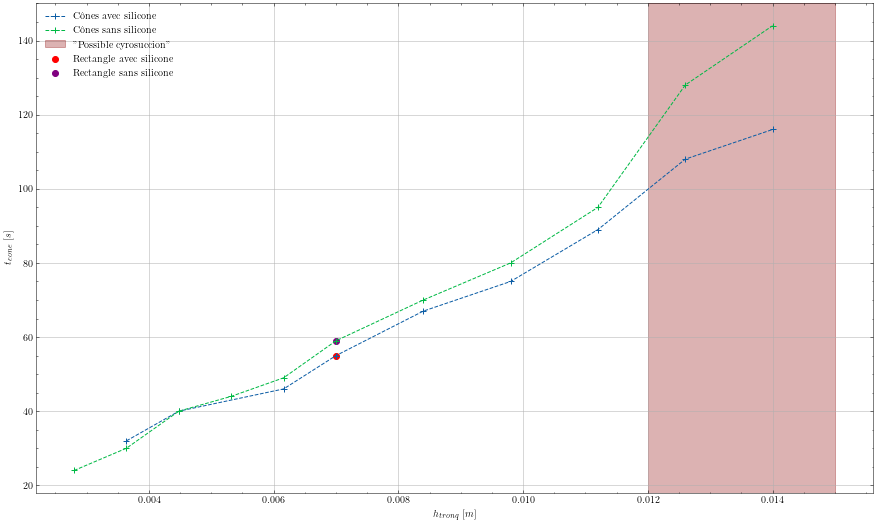

In [6]:
plt.figure(figsize=[15,9])
plt.plot(h_tronq[mask], t_cone_silicone[mask], '--+', label='Cônes avec silicone')
plt.plot(h_tronq[mask_bis], t_cone[mask_bis], '--+', label='Cônes sans silicone')

plt.axvspan(0.012, 0.015, color='darkred', alpha=0.3, label='"Possible cyrosuccion"')

plt.scatter([0.007], [55], color='red', label='Rectangle avec silicone')
plt.scatter([0.007], [59], color='purple', label='Rectangle sans silicone')

plt.xlabel(r'$h_{tronq}$ [$m$]')
plt.ylabel(r'$t_{cone}$ [$s$]')

plt.grid()
plt.legend()

plt.savefig("")

Avec notre autre script, on peut regarder les valeurs théoriques qu'on doit obtenir :

In [7]:
Dt_theo_cones = np.array([6.39426470e-06,9.56836141e-06,1.30507220e-05,1.67510746e-05,
 2.05913129e-05,2.44880296e-05,3.09807639e-05,3.71384257e-05
,4.26057353e-05,4.68872549e-05,4.90000000e-05])

In [8]:
D = 6.9e-9*110

In [9]:
t_theo_cones = Dt_theo_cones/D

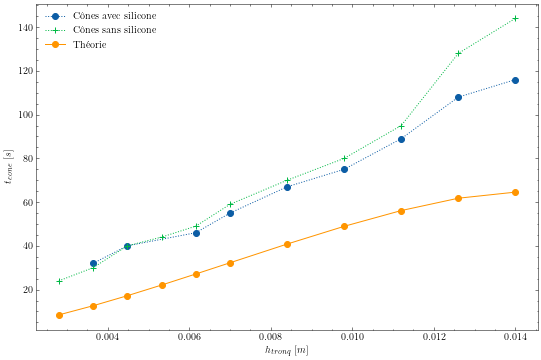

In [10]:
plt.figure(figsize=[9,6])
plt.plot(h_tronq[mask], t_cone_silicone[mask], ':o', label='Cônes avec silicone')
plt.plot(h_tronq[mask_bis], t_cone[mask_bis], ':+', label='Cônes sans silicone')
plt.plot(h_tronq, t_theo_cones, '-o', label='Théorie')

#plt.scatter([0.007], [55], color='red', label='Rectangle')

plt.xlabel(r'$h_{tronq}$ [$m$]')
plt.ylabel(r'$t_{cone}$ [$s$]')

plt.legend()

### Ajout des incertitudes

Text(0.5, 1.0, 'Temps de congélation pour différents cônes tronqués à $T=-110$ °C')

<Figure size 648x432 with 0 Axes>

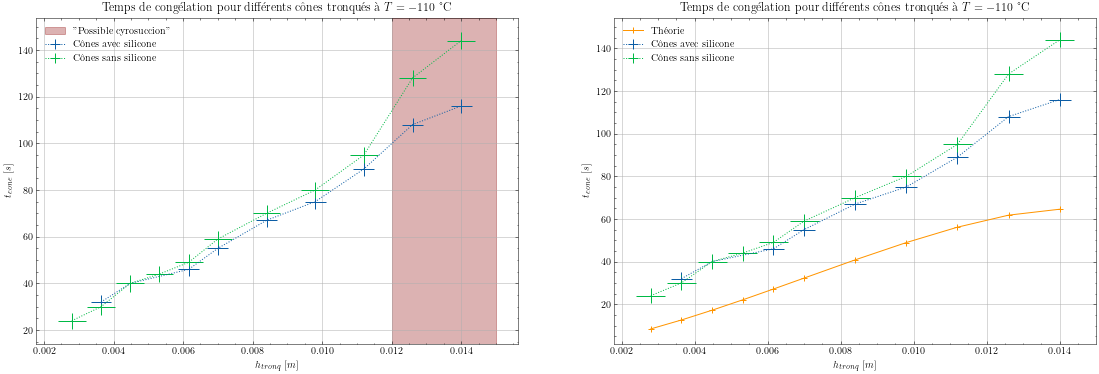

In [11]:
plt.figure(figsize=[9,6])

h_error_sili = 0.0003
t_error_sili = 3

h_error = 0.0004
t_error = 3.5


plt.figure(figsize=(19, 6))

plt.subplot(1, 2, 1)
    
plt.errorbar(h_tronq[mask], t_cone_silicone[mask], xerr=h_error_sili, yerr=t_error_sili, fmt=':+', label='Cônes avec silicone')
plt.errorbar(h_tronq[mask_bis], t_cone[mask_bis], xerr=h_error, yerr=t_error, fmt=':+', label='Cônes sans silicone')

plt.axvspan(0.012, 0.015, color='darkred', alpha=0.3, label='"Possible cyrosuccion"')
    
plt.xlabel(r'$h_{tronq}$ [$m$]')
plt.ylabel(r'$t_{cone}$ [$s$]')
plt.legend()

plt.grid()
    
plt.title(r"Temps de congélation pour différents cônes tronqués à $T=-110$ °C")
plt.subplot(1, 2, 2)
    
plt.errorbar(h_tronq[mask], t_cone_silicone[mask], xerr=h_error_sili, yerr=t_error_sili, fmt=':+', label='Cônes avec silicone')
plt.errorbar(h_tronq[mask_bis], t_cone[mask_bis], xerr=h_error, yerr=t_error, fmt=':+', label='Cônes sans silicone')
plt.plot(h_tronq, t_theo_cones, '-+', label='Théorie')
    
plt.xlabel(r'$h_{tronq}$ [$m$]')
plt.ylabel(r'$t_{cone}$ [$s$]')
plt.legend()

plt.grid()
    
plt.title(r"Temps de congélation pour différents cônes tronqués à $T=-110$ °C")

In [12]:
t_exp_silicone = np.array([None, None, None, None, 48 ,None , None, None, None, None, None])
t_exp = np.array([28, 37, 43, 48 , 55 , 59, 74, 63+35, 120+1, 120+19, 120+35])

In [13]:
mask_exp = np.array([value is not None for value in t_exp_silicone])

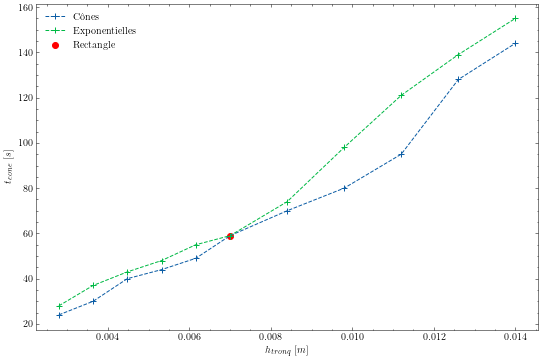

In [14]:
plt.figure(figsize=[9,6])
plt.plot(h_tronq[mask_bis], t_cone[mask_bis], '--+', label='Cônes')
plt.plot(h_tronq, t_exp, '--+', label='Exponentielles')

plt.scatter([h_tronq[5]], [t_cone[5]], color='red', label='Rectangle')

plt.xlabel(r'$h_{tronq}$ [$m$]')
plt.ylabel(r'$t_{cone}$ [$s$]')

plt.legend()

Comparaison à la théorie exponentielle

In [15]:
Dt_theo_exp = np.array([7.26469376e-06,1.02689250e-05, 1.35232408e-05,1.69954898e-05, 
                        2.06610153e-05, 2.44761274e-05, 3.12402045e-05, 3.83553253e-05, 
                        4.57957252e-05, 5.35204754e-05, 6.14950420e-05])

In [16]:
t_theo_exp = Dt_theo_exp/D

## Figure finale

Text(0.5, 1.0, 'Evolution du temps de congélation en fonction des hauteurs de troncage à $T=-110$ °C')

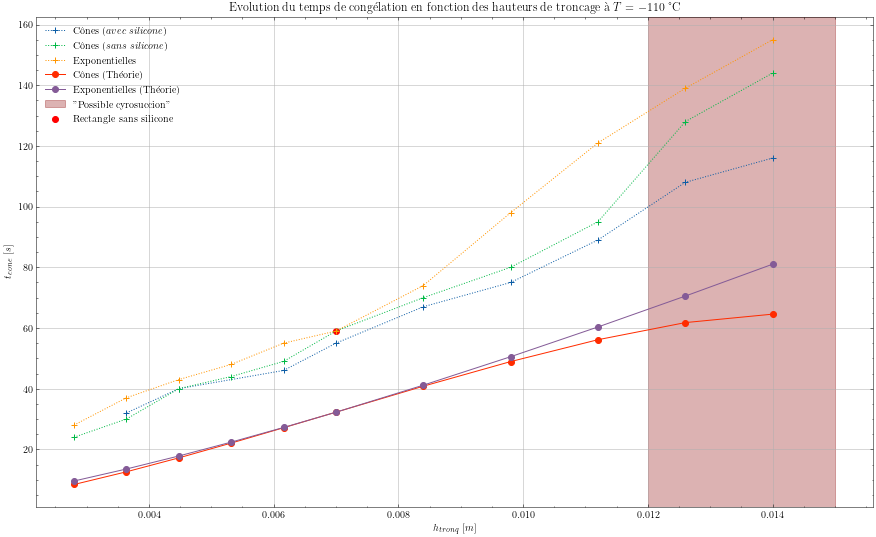

In [20]:
plt.figure(figsize=[15,9])
plt.plot(h_tronq[mask], t_cone_silicone[mask], ':+', label='Cônes $(avec$ $silicone)$')
plt.plot(h_tronq[mask_bis], t_cone[mask_bis], ':+', label='Cônes $(sans$ $silicone)$')
plt.plot(h_tronq, t_exp, ':+', label='Exponentielles')

plt.scatter([h_tronq[5]], [t_cone[5]], color='red', label='Rectangle sans silicone')

plt.plot(h_tronq, t_theo_cones, '-o', label='Cônes (Théorie)')
plt.plot(h_tronq, t_theo_exp, '-o', label='Exponentielles (Théorie)')

plt.axvspan(0.012, 0.015, color='darkred', alpha=0.3, label='"Possible cyrosuccion"')

#plt.scatter([0.007], [55], color='red', label='Rectangle')

plt.xlabel(r'$h_{tronq}$ [$m$]')
plt.ylabel(r'$t_{cone}$ [$s$]')

plt.grid()

plt.legend()
plt.title("Evolution du temps de congélation en fonction des hauteurs de troncage à $T=-110$ °C")

#plt.savefig("Courbe finale.png")

## Normalisation des axes

Text(0.5, 1.0, 'Evolution du temps de congélation en fonction des hauteurs de troncage à $T=-110$ °C')

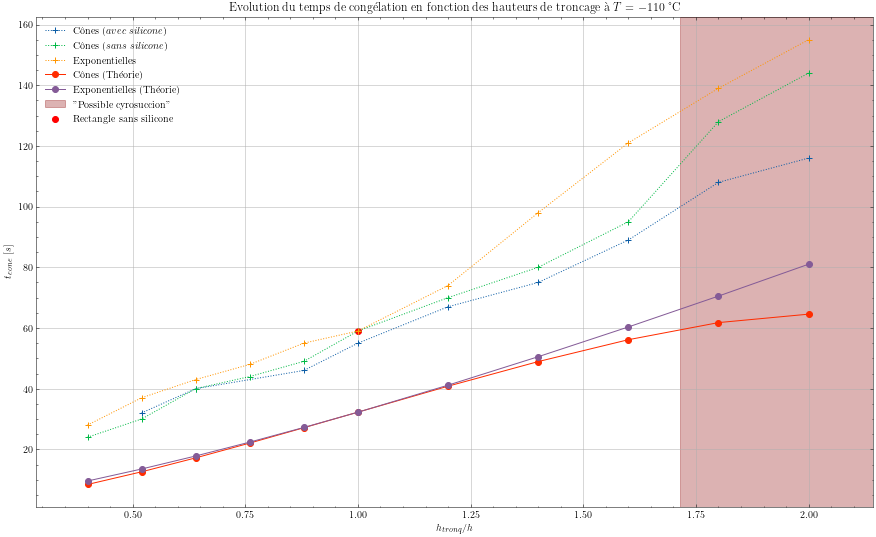

In [21]:
plt.figure(figsize=[15,9])
plt.plot(h_tronq[mask]/h, t_cone_silicone[mask], ':+', label='Cônes $(avec$ $silicone)$')
plt.plot(h_tronq[mask_bis]/h, t_cone[mask_bis], ':+', label='Cônes $(sans$ $silicone)$')
plt.plot(h_tronq/h, t_exp, ':+', label='Exponentielles')

xmin = 2e-3/h
xmax = 15e-3/h

plt.xlim(xmin, xmax)
 
plt.scatter([h_tronq[5]/h], [t_cone[5]], color='red', label='Rectangle sans silicone')

plt.plot(h_tronq/h, t_theo_cones, '-o', label='Cônes (Théorie)')
plt.plot(h_tronq/h, t_theo_exp, '-o', label='Exponentielles (Théorie)')

plt.axvspan(0.012/h, 0.015/h, color='darkred', alpha=0.3, label='"Possible cyrosuccion"')

#plt.scatter([0.007], [55], color='red', label='Rectangle')

plt.xlabel(r'$h_{tronq}/h$')
plt.ylabel(r'$t_{cone}$ [$s$]')

plt.grid()

plt.legend()
plt.title("Evolution du temps de congélation en fonction des hauteurs de troncage à $T=-110$ °C")

#plt.savefig("Courbe finale.png")

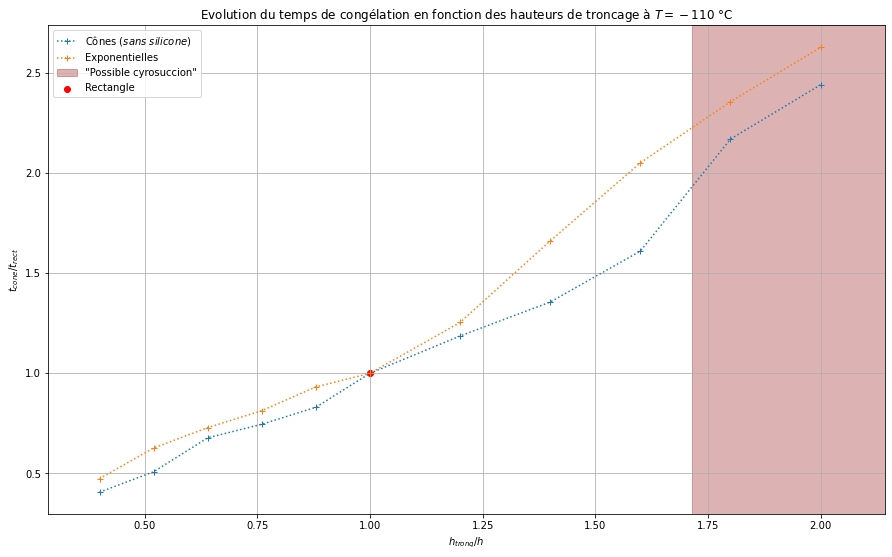

In [21]:
plt.figure(figsize=[15,9])

t_rect = 59

xmin = 2e-3/h
xmax = 15e-3/h

#plt.plot(h_tronq[mask]/h, t_cone_silicone[mask], ':+', label='Cônes $(avec$ $silicone)$')
plt.plot(h_tronq[mask_bis]/h, t_cone[mask_bis]/t_rect, ':+', label='Cônes $(sans$ $silicone)$')
plt.plot(h_tronq/h, t_exp/t_rect, ':+', label='Exponentielles')

plt.xlim(xmin, xmax)
 
plt.scatter([h_tronq[5]/h], [t_cone[5]/t_rect], color='red', label='Rectangle')

#plt.plot(h_tronq/h, t_theo_cones, '-o', label='Cônes $(Théorie)$')
#plt.plot(h_tronq/h, t_theo_exp, '-o', label='Exponentielles $(Théorie)$')

plt.axvspan(0.012/h, 0.015/h, color='darkred', alpha=0.3, label='"Possible cyrosuccion"')

#plt.scatter([0.007], [55], color='red', label='Rectangle')

plt.xlabel(r'$h_{tronq}/h$')
plt.ylabel(r'$t_{cone}/t_{rect}$')

plt.grid()

plt.legend()
plt.title("Evolution du temps de congélation en fonction des hauteurs de troncage à $T=-110$ °C")

plt.savefig("Courbe finale.png")

On normalise l'experience par rapport à son temps de référence au rectangle exp et la théorie par rapport à son temps de référence au rectangle théorique

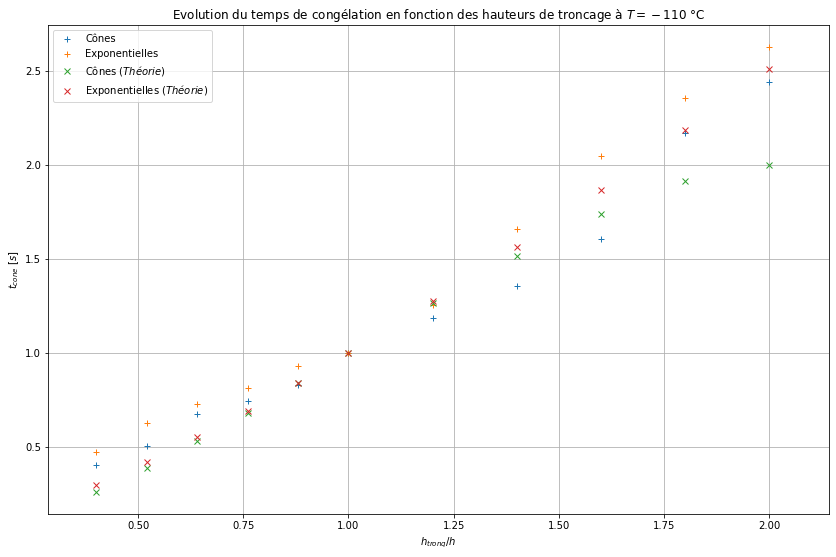

In [38]:
plt.figure(figsize=[14,9])
#plt.plot(h_tronq[mask]/h, t_cone_silicone[mask]/t_rect_exp, ':+', label='Cônes $(avec$ $silicone)$')
plt.plot(h_tronq[mask_bis]/h, t_cone[mask_bis]/t_rect_exp, '+', label='Cônes')
plt.plot(h_tronq/h, t_exp/t_rect_exp, '+', label='Exponentielles')

xmin = 2e-3/h
xmax = 15e-3/h

t_rect_exp = 59
t_rect_theo = t_theo_exp[5]

plt.xlim(xmin, xmax)
 
#plt.scatter([1], [1], color='red', label='Rectangle sans silicone')

plt.plot(h_tronq/h, t_theo_cones/t_rect_theo, 'x', label='Cônes $(Théorie)$')
plt.plot(h_tronq/h, t_theo_exp/t_rect_theo, 'x', label='Exponentielles $(Théorie)$')

#plt.axvspan(0.012/h, 0.015/h, color='darkred', alpha=0.3, label='"Possible cyrosuccion"')

#plt.scatter([0.007], [55], color='red', label='Rectangle')

plt.xlabel(r'$h_{tronq}/h$')
plt.ylabel(r'$t_{cone}$ [$s$]')

plt.grid()

plt.legend()
plt.title("Evolution du temps de congélation en fonction des hauteurs de troncage à $T=-110$ °C")

plt.savefig("Courbe finale.png")

### Récapitualif synthétique des données expérimentales

In [22]:
import pandas as pd

In [21]:
"""Création du dictionnaire"""

data = {
    'h_t [m]': h_tronq,
    'Temps cônes [s]': t_cone,
    'Temps cônes (silicone) [s]': t_cone_silicone,
    'Temps exp [s]': t_exp
}

# Créer un DataFrame à partir du dictionnaire de données
df = pd.DataFrame(data)

# Afficher le DataFrame
print(df)


    h_t [m]  Temps cônes [s] Temps cônes (silicone) [s]  Temps exp [s]
0   0.00280               24                       None             28
1   0.00364               30                         32             37
2   0.00448               40                         40             43
3   0.00532               44                       None             48
4   0.00616               49                         46             55
5   0.00700               59                         55             59
6   0.00840               70                         67             74
7   0.00980               80                         75             98
8   0.01120               95                         89            121
9   0.01260              128                        108            139
10  0.01400              144                        116            155
